In [1]:
"""code along for a pretend flower shop, i have 4 different flowers: Rose, Hydrangea, Lily, and Hibiscus.
To create the data, i measured each flower by: Petal length, Petal width, and Stem thickness"""


import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Features: [petal length, petal width, stem thickness]
X = np.array([
    [5.0, 2.0, 1.2],  # Rose
    [5.2, 2.1, 1.3],
    [4.9, 1.9, 1.1],
    
    [6.0, 5.5, 0.8],  # Hydrangea
    [6.1, 5.7, 0.9],
    [5.9, 5.6, 0.7],
    
    [3.0, 1.0, 0.5],  # Lily
    [3.1, 1.2, 0.6],
    [2.9, 0.9, 0.5],
    
    [7.0, 3.5, 1.5],  # Hibiscus
    [7.1, 3.4, 1.6],
    [6.9, 3.6, 1.4],
])

# Labels: 0 = Rose, 1 = Hydrangea, 2 = Lily, 3 = Hibiscus
y = np.array([
    0, 0, 0,   # Rose
    1, 1, 1,   # Hydrangea
    2, 2, 2,   # Lily
    3, 3, 3    # Hibiscus
])




In [3]:
#Step 2: Split and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# model is now studying 9 of the flowers and will be tested on the remaining 3.

# Step 3: Predict
# so the first time i ran this, it was 1 for three, it correctly guessed hibiscus but thought 2 roses were lilies. 

predictions = model.predict(X_test)
print("Predicted:", predictions)
print("Actual:   ", y_test)
# Predicted: [2 3 2]
# Actual:    [0 3 0]
flower_names = ['Rose', 'Hydrangea', 'Lily', 'Hibiscus']

for i in range(len(predictions)):
    print(f"Predicted: {flower_names[predictions[i]]} — Actual: {flower_names[y_test[i]]}")

Predicted: [2 2 3]
Actual:    [0 0 3]
Predicted: Lily — Actual: Rose
Predicted: Lily — Actual: Rose
Predicted: Hibiscus — Actual: Hibiscus


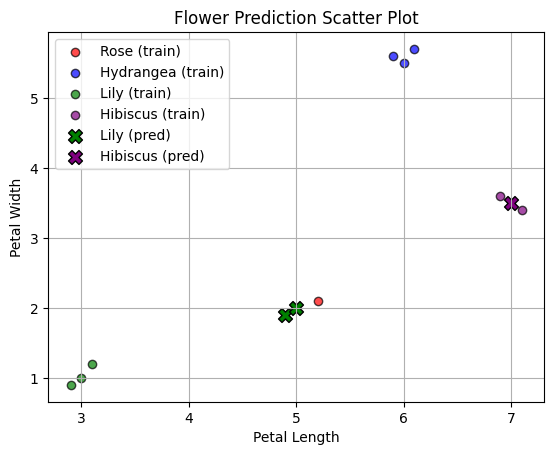

In [4]:
# i also wanted to create a visual to plot two features since were covering features tonight. so i decided to do a scatter plot using 2 features, petal length, and petal width and i wanted to highlight test data points

import matplotlib.pyplot as plt

# Just for labeling
flower_names = ['Rose', 'Hydrangea', 'Lily', 'Hibiscus']
colors = ['red', 'blue', 'green', 'purple']

# Choose the two features to plot (e.g., petal length = 0, petal width = 1)
x_index = 0  # petal length
y_index = 1  # petal width

# Plot all training data
for label in np.unique(y_train):
    plt.scatter(
        X_train[y_train == label, x_index],
        X_train[y_train == label, y_index],
        label=f"{flower_names[label]} (train)",
        c=colors[label],
        edgecolor='k',
        alpha=0.7,
        marker='o'
    )

# Plot test data with predicted labels
for i in range(len(X_test)):
    plt.scatter(
        X_test[i, x_index],
        X_test[i, y_index],
        c=colors[predictions[i]],
        marker='X',
        edgecolor='black',
        s=100,
        label=f"{flower_names[predictions[i]]} (pred)" if f"{flower_names[predictions[i]]} (pred)" not in plt.gca().get_legend_handles_labels()[1] else None
    )

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Flower Prediction Scatter Plot")
plt.legend()
plt.grid(True)
plt.show()

# Circles → training flowers (true label)
# X markers → test flowers (predicted label)
# Color = flower type
# how close test points are to similar training ones

In [5]:
"""So i wanted to use my same flower data and swap from logistic regression to k-neighbors-classifier, this model will make predictions based on closeness and not formulas"""

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Your original flower data
X = np.array([
    [5.0, 2.0, 1.2],  # Rose
    [5.2, 2.1, 1.3],
    [4.9, 1.9, 1.1],
    
    [6.0, 5.5, 0.8],  # Hydrangea
    [6.1, 5.7, 0.9],
    [5.9, 5.6, 0.7],
    
    [3.0, 1.0, 0.5],  # Lily
    [3.1, 1.2, 0.6],
    [2.9, 0.9, 0.5],
    
    [7.0, 3.5, 1.5],  # Hibiscus
    [7.1, 3.4, 1.6],
    [6.9, 3.6, 1.4],
])

y = np.array([
    0, 0, 0,   # Rose
    1, 1, 1,   # Hydrangea
    2, 2, 2,   # Lily
    3, 3, 3    # Hibiscus
])

In [6]:
flower_names = ['Rose', 'Hydrangea', 'Lily', 'Hibiscus']
colors = ['red', 'blue', 'green', 'purple']

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create and train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
# Make predictions on the test set
predictions = knn.predict(X_test)

print("Predicted:", predictions)
print("Actual:   ", y_test)

for i in range(len(predictions)):
    print(f"Predicted: {flower_names[predictions[i]]} — Actual: {flower_names[y_test[i]]}")

    # just like logReg it went 1 for 3 on the first run.
# Predicted: [0 0 0]
# Actual:    [3 0 3]
# Predicted: Rose — Actual: Hibiscus
# Predicted: Rose — Actual: Rose
# Predicted: Rose — Actual: Hibiscus


Predicted: [0 1 0]
Actual:    [3 1 3]
Predicted: Rose — Actual: Hibiscus
Predicted: Hydrangea — Actual: Hydrangea
Predicted: Rose — Actual: Hibiscus


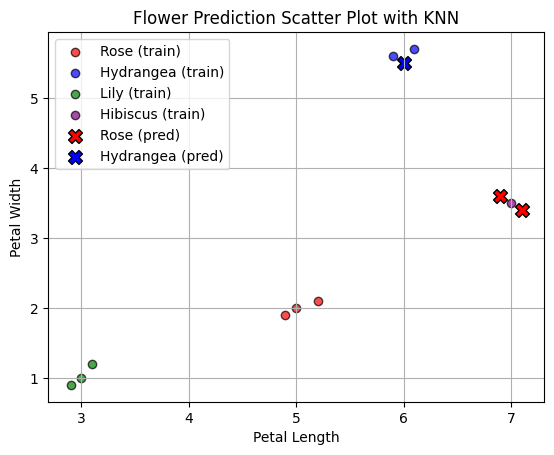

In [8]:
# Plotting the data using petal length and petal width (features 0 and 1)
x_index, y_index = 0, 1

# Plot training data
for label in np.unique(y_train):
    plt.scatter(
        X_train[y_train == label, x_index],
        X_train[y_train == label, y_index],
        label=f"{flower_names[label]} (train)",
        c=colors[label],
        edgecolor='k',
        alpha=0.7,
        marker='o'
    )
# Plot test data with predicted labels
for i in range(len(X_test)):
    plt.scatter(
        X_test[i, x_index],
        X_test[i, y_index],
        c=colors[predictions[i]],
        marker='X',
        edgecolor='black',
        s=100,
        label=f"{flower_names[predictions[i]]} (pred)" if f"{flower_names[predictions[i]]} (pred)" not in plt.gca().get_legend_handles_labels()[1] else None
    )

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Flower Prediction Scatter Plot with KNN")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# so after running these and seeing the visuals, what really stood out was they seem very similar even though they "think" differently.

# Logistic Regression tries to draw straight-ish lines (boundaries) to separate flowers based on the features it learned from the training data. 
# It’s like fitting a formula.

# KNN just looks around for the closest neighbors and says “this test flower looks most like these training flowers.” No formula, just direct comparison.

# so my next step is actually plugging in what weve covered this week and what i can try to get a better grasp of. i ask chat what i should do.
#  Build a Simple Linear Regression Example (Flower Price)
# Why?
# It connects your existing flower features to new ML concepts like regression, error, and trendlines.
# It teaches how regression predicts values, not labels.
# You'll get to compare: classification (type of flower) vs regression (price of flower).

# Here’s what we’ll do:
# Add a fake “price” to each flower based on features (like longer petals = more expensive)
# Train a LinearRegression model
# Plot the prediction line
# Show how well it did with MAE or R²

# so im jumping back to logReg file


# New: Prices for each flower (in dollars)
# These are just made-up values, slightly tied to petal/stem size
flower_prices = np.array([
    10.0, 10.5, 9.8,   # Rose
    12.0, 12.5, 11.8,  # Hydrangea
    7.0, 7.5, 6.8,     # Lily
    15.0, 15.2, 14.8   # Hibiscus
])

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Split features and price
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, flower_prices, test_size=0.25)

# Step 2: Build the regression model
reg_model = LinearRegression()
reg_model.fit(X_train_price, y_train_price)

# Step 3: Predict flower prices
price_predictions = reg_model.predict(X_test_price)

# Step 4: Print predictions vs actual
print("\n--- Linear Regression (Predicting Price) ---")
for pred, actual in zip(price_predictions, y_test_price):
    print(f"Predicted: ${pred:.2f} — Actual: ${actual:.2f}")

# Step 5: Evaluate model performance
mae = mean_absolute_error(y_test_price, price_predictions)
r2 = r2_score(y_test_price, price_predictions)
print(f"\nMean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# one prediction was dead-on 14.80 and the other 2 were very close. the mean_absolute_error was .37 
# so that means i was less that 40 cents off and my r2 was.94, which means 94% of the price variation is explained by my features






--- Linear Regression (Predicting Price) ---
Predicted: $6.61 — Actual: $7.50
Predicted: $6.80 — Actual: $7.00
Predicted: $10.46 — Actual: $9.80

Mean Absolute Error: 0.58
R² Score: 0.72


In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features transformer (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform your training and test features
X_train_poly = poly.fit_transform(X_train_price)
X_test_poly = poly.transform(X_test_price)

# Now fit the regression model with polynomial features
reg_model_poly = LinearRegression()
reg_model_poly.fit(X_train_poly, y_train_price)

# Predict with polynomial features
price_predictions_poly = reg_model_poly.predict(X_test_poly)

# Evaluate
mae_poly = mean_absolute_error(y_test_price, price_predictions_poly)
r2_poly = r2_score(y_test_price, price_predictions_poly)

print("\n--- Polynomial Regression (degree 2) ---")
for pred, actual in zip(price_predictions_poly, y_test_price):
    print(f"Predicted: ${pred:.2f} — Actual: ${actual:.2f}")

print(f"\nMean Absolute Error (Poly): {mae_poly:.2f}")
print(f"R² Score (Poly): {r2_poly:.2f}")



--- Polynomial Regression (degree 2) ---
Predicted: $6.01 — Actual: $7.50
Predicted: $6.35 — Actual: $7.00
Predicted: $9.77 — Actual: $9.80

Mean Absolute Error (Poly): 0.72
R² Score (Poly): 0.41


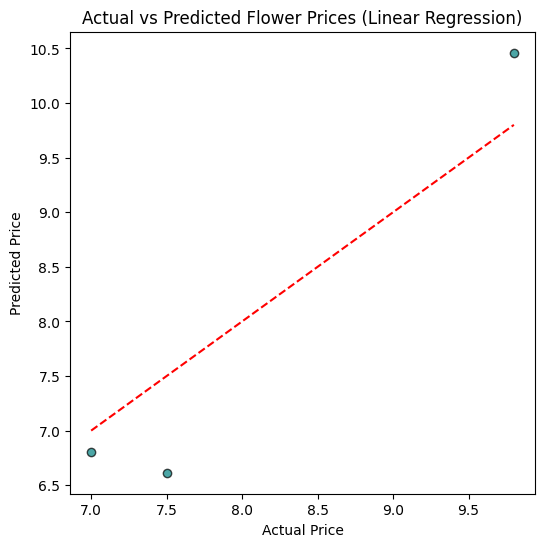

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test_price, price_predictions, color='teal', edgecolor='k', alpha=0.7)
plt.plot([min(y_test_price), max(y_test_price)], [min(y_test_price), max(y_test_price)], 'r--')  # 45-degree line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flower Prices (Linear Regression)")
plt.show()


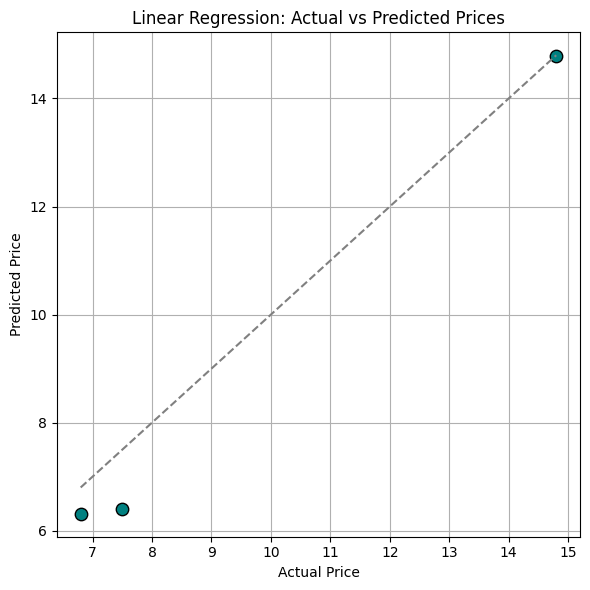

In [32]:
# visuals for actual vs predicted prices

import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted Prices

plt.figure(figsize=(6, 6))
plt.scatter(y_test_price, price_predictions, color='teal', edgecolor='black', s=80)
plt.plot([min(y_test_price), max(y_test_price)],
         [min(y_test_price), max(y_test_price)],
         color='gray', linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# Each dot is one flower.
# Dots on the diagonal line = perfect predictions
# Dots near the line = close predictions
# Far from the line = model missed


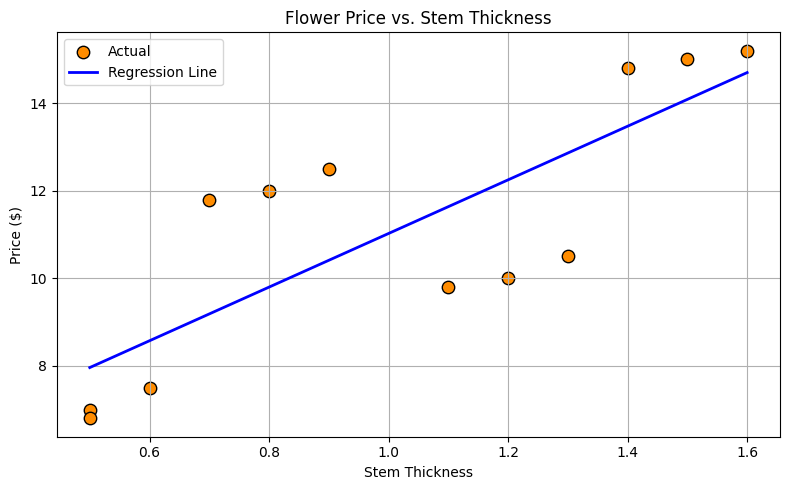

In [27]:
# now the next step i wanna see plot price vs stem thickness(single feature)
# See a trend line (how price rises/falls with stem thickness)
# Understand feature impact
# Connect real values to prediction patterns

# Plot: Stem Thickness vs. Price with Regression Line

# Use only stem thickness (index 2)
stem_thickness = X[:, 2].reshape(-1, 1)
prices = flower_prices

# Train regression on just stem thickness
simple_reg = LinearRegression()
simple_reg.fit(stem_thickness, prices)

# Predict line
x_line = np.linspace(min(stem_thickness), max(stem_thickness), 100).reshape(-1, 1)
y_line = simple_reg.predict(x_line)

# Dots = actual flower prices

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(stem_thickness, prices, color='darkorange', edgecolor='black', s=80, label='Actual')
plt.plot(x_line, y_line, color='blue', linewidth=2, label='Regression Line')
plt.xlabel("Stem Thickness")
plt.ylabel("Price ($)")
plt.title("Flower Price vs. Stem Thickness")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Blue line = what the model “learned”
# If the dots hug the line → this feature is a strong predictor


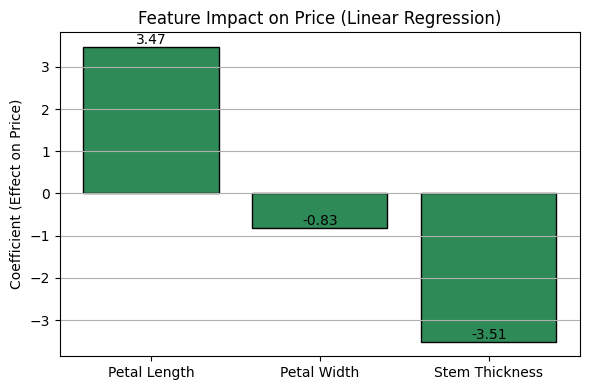

In [28]:
# at this point, i have done classifiers(logReg and KNN) to predict a flower type, a regressor(linearReg) to predict flower price, 
# and made visuals for all. To now wrap it all together,
# i want to lock it in with side by side comparisons of all of my features impact on price(bar chart of coefficients)


# Show how much each feature affects price
feature_names = ["Petal Length", "Petal Width", "Stem Thickness"]
coefficients = reg_model.coef_



# Which feature mattered most for price prediction
# Which features had small or negative impact
# This is called interpreting model weights — essential in machine learning

plt.figure(figsize=(6, 4))
bars = plt.bar(feature_names, coefficients, color='seagreen', edgecolor='black')
plt.title("Feature Impact on Price (Linear Regression)")
plt.ylabel("Coefficient (Effect on Price)")
plt.grid(axis='y')

# Label bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.2f}", va='bottom', ha='center')

plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
# Calculate accuracy for your KNN model
accuracy = accuracy_score(y_test, predictions)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")


for k in [1, 3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"K={k} --> Accuracy: {acc * 100:.2f}%")

#     At k=1, your KNN got 100% accuracy on the test set — that means it’s basically looking at the closest single neighbor, which works perfectly here.

# At k=3, accuracy dropped to 33.33%, and even worse at k=5 and 7.

# Here's what happens at each k:
# k=1 → Look at only 1 closest flower in the training data.
# → "What flower is closest to me?" → That’s the guess.

# k=3 → Look at the 3 closest flowers and take a vote.
# → "What are these 3 flowers around me? Most are roses? Then I’m a rose."

# k=5 → Look at the 5 nearest flowers.
# → "What type shows up the most in those 5? I’ll go with that."

# k=7 → Look at the 7 nearest neighbors.
# → Bigger vote. Majority wins.



KNN Accuracy: 33.33%
K=1 --> Accuracy: 100.00%
K=3 --> Accuracy: 33.33%
K=5 --> Accuracy: 0.00%
K=7 --> Accuracy: 0.00%


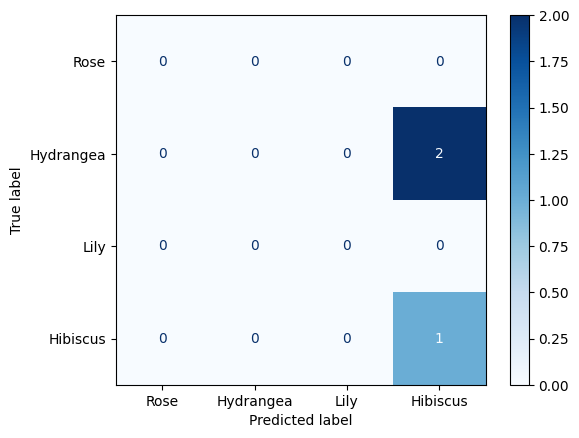

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#  Confusion matrix to see detailed results
# Suppose y_test and predictions are your test and predicted labels

labels = [0, 1, 2, 3]  # all flower classes by their numeric labels

cm = confusion_matrix(y_test, predictions, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=flower_names)

disp.plot(cmap='Blues')
plt.show()

# The bottom row of labels is for the predicted values (what the model guessed).
# The left-hand labels (on the side) are the true values (what the flower actually was).

# So when looking at my chart:
# Left to right = What the model predicted
# Top to bottom = What the flower actually was


# Dark blue = Higher number = The model did this more often
# Light blue = Lower number = The model did this once or just a few times
# White or super light = Basically zero = That combination didn’t happen





In [ ]:
# So far i've built and visualized two classifiers (LogReg + KNN), a regressor (Linear Regression) for price, and added feature
# impact visualizations, error evaluation, and even comparison across K values.